# The Pole-Barn Paradox
See http://hyperphysics.phy-astr.gsu.edu/hbase/Relativ/polebarn.html#c1 <br>
As usually stated (?), you close up a long pole in a shorter barn by boosting the pole to beta = lots.  Following the above example, the pole is 20 m long, and the barn is 10 m long with a front and back door.  So in the S-frame where the barn is at rest, the pole looks short and we can close it up in the barn.  *BUT,* in the Pole-frame (S'), the barn is short and there is now way to "trap the pole inside."

## Let t=t'=0 when the front of the pole almost touches the front of the barn
Pick beta=0.9 for the pole, moving from left to right in the S-frame.  So the Barn moves right-left in the S'-frame.  Use the LLF() class to handle the Lorentz transformations.

In [23]:
%matplotlib notebook
import numpy as np
import scipy
import matplotlib.pyplot as plt

import LLFTransforms as LLFT  # For the LLF() class especially, also has LorShape to handle sets of points.

Traceback (most recent call last):
  File "C:\Users\steve\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\steve\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [24]:
beta = 0.9
lpole = 20.0
lbarn = 10.0
aLLF = LLFT.LLF(beta, 2)  # Work in just (t',x') and (t,x) space, 2 dimensional.
bLLF = LLFT.LLF(-beta, 2)

In [46]:
# S' pole shape
poleSP = np.array( [ [0.0, -lpole], [0.0, 0.0] ] )  # Pole (t', x') in S'-frame.
mp = np.array( [ [1.0, 0.0] for uu in poleSP ] )
barnS = np.array( [ [ 0.0, 0.0], [0.0, lbarn]] )    # Barn (t, x) collection in S-frame
m = np.array( [ [1.0, 0.0] for uu in barnS ] )                      
                      
#pole = LLFT.LorShape(beta, 2, poleSP, mp)
barn = LLFT.LorShape(-beta, 2, barnS, m)

In [47]:
# Draw a closed polygon as a starting shape at t'=0, and will move by m' .
#
# Make it 1 deep and +/- 1/4 for y.  All in the x-y plane and time is t' = 0.0 say.
xw = 0.5 #xwidth of the barn wall (door side)
yw = 1.5  #ywidth of the barn wall (non-door side)
yh = 2 #height
xl = 10 #total barn length
diff = 1.0 #the distance between the bottom of the barn piece and the x-axis

#Build arrays for top and bottom of barn
BarnTOP = np.array([ [0.0, yh], [0.0, diff], [xw, diff], [xw, yw], [xl-xw, yw], [xl-xw, diff], [xl, diff], [xl, yh], [0.0, yh] ])
BarnBOT = np.array([ [0.0, -yh], [0.0, -diff], [xw, -diff], [xw, -yw], [xl-xw, -yw], [xl-xw, -diff], [xl, -diff], [xl, -yh], [0.0, -yh] ])


In [64]:
#build pole

fig, ax = plt.subplots( figsize=(8,6))
pole = np.array( [-21,-1],[0,0])

pole_line = np.linspace(-21,-1)

plt.plot(pole)
plt.show()



<IPython.core.display.Javascript object>

TypeError: data type not understood

<IPython.core.display.Javascript object>


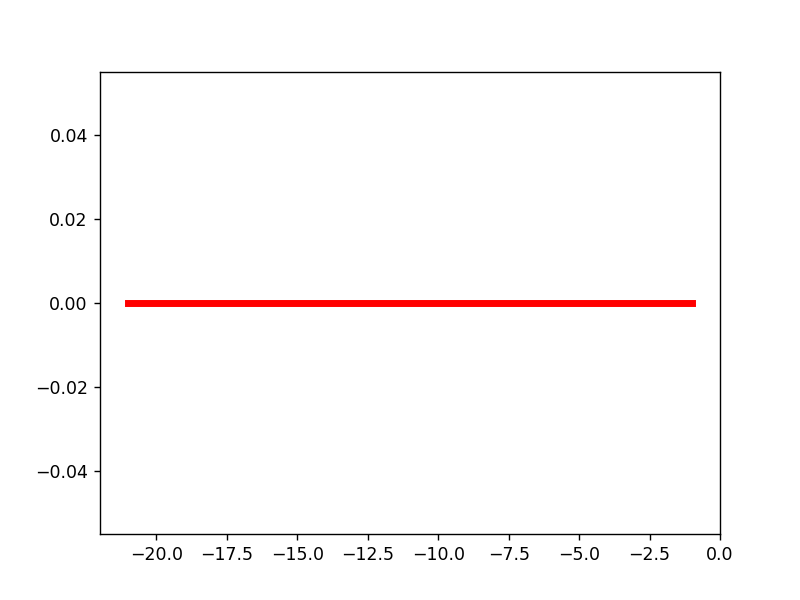

In [52]:
#import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
start = [-21, -1]
end = [0, 0]
plt.plot(start, end, 'r-', lw=4)
plt.show()



<IPython.core.display.Javascript object>


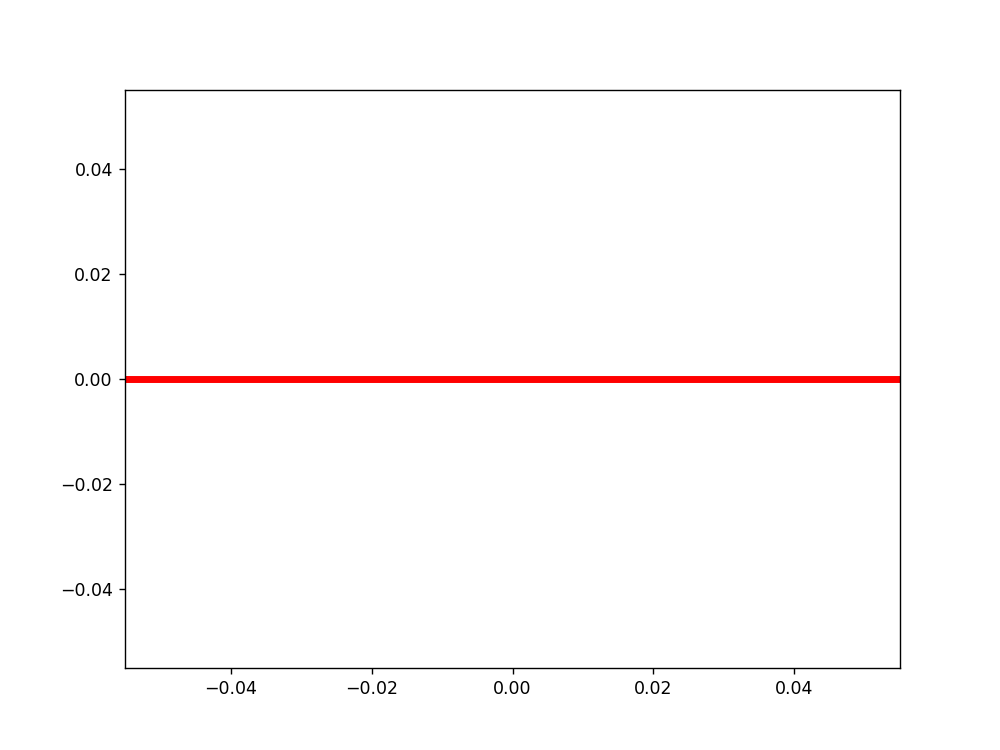

In [69]:
from matplotlib.animation import FuncAnimation

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots( figsize=(8,6) )
pole2, = plt.plot([], [], 'r-', lw=4)

# initialization function: plot the background of each frame
def init():
    pole2.set_data( [], [] )
    return pole2,

# animation function.  This is called sequentially
def animate(i):
    back = [(-21+i),(-1+i)]
    front = [0,0]
    pole2.set_data([back], [front])
    return pole2,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=20, interval=2, blit=True)

plt.show()

<IPython.core.display.Javascript object>


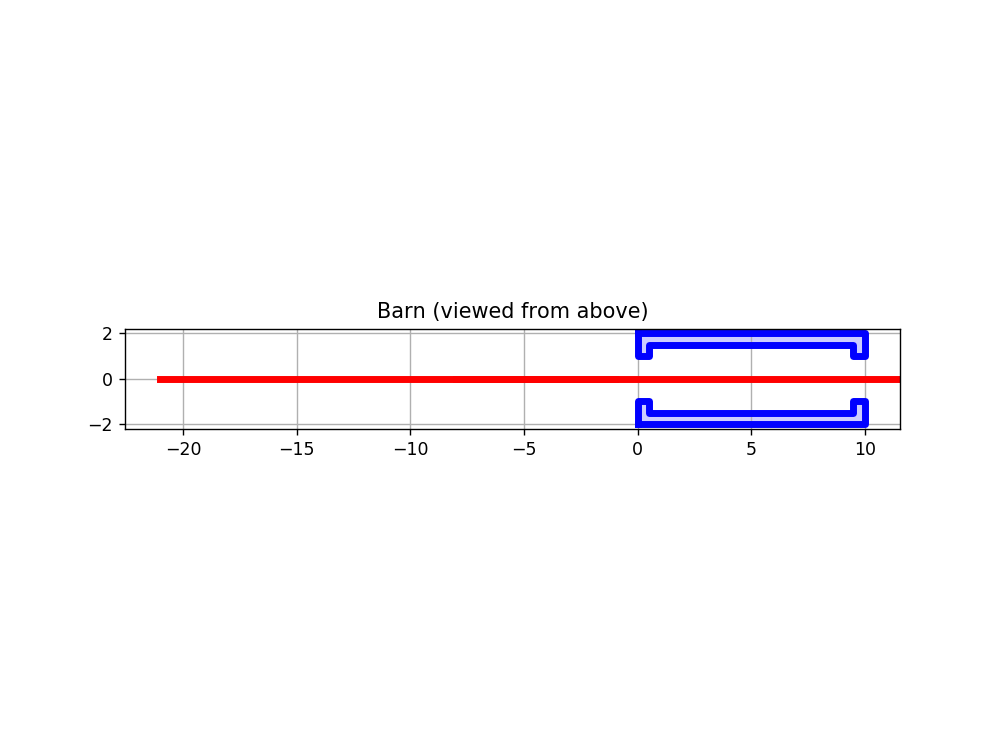

In [70]:
fig, ax = plt.subplots( figsize=(8,6) )

#transpose barn arrays
xx = BarnTOP.transpose()[0]
yy = BarnTOP.transpose()[1]

qq = BarnBOT.transpose()[0]
ww = BarnBOT.transpose()[1]

#pxx = pole.transpose()[0]
#pyy = pole.transpose()[1]
pole2, = plt.plot([], [], 'r-', lw=4)

# initialization function: plot the background of each frame
def init():
    pole2.set_data( [], [] )
    return pole2,

# animation function.  This is called sequentially
def animate(i):
    back = [(-21+i),(-1+i)]
    front = [0,0]
    pole2.set_data([back], [front])
    return pole2,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=20, interval=2, blit=True)


ax.fill( xx, yy, 'b', qq, ww, 'b', alpha=0.2)

#ax.plot( xx, yy, qq, ww, 'ko', label='dots')
ax.set_aspect(1.0)
ax.plot( xx, yy, 'b-', qq, ww, 'b-', pxx, pyy, 'r-', label='lines', lw=4)
plt.title('Barn (viewed from above)')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


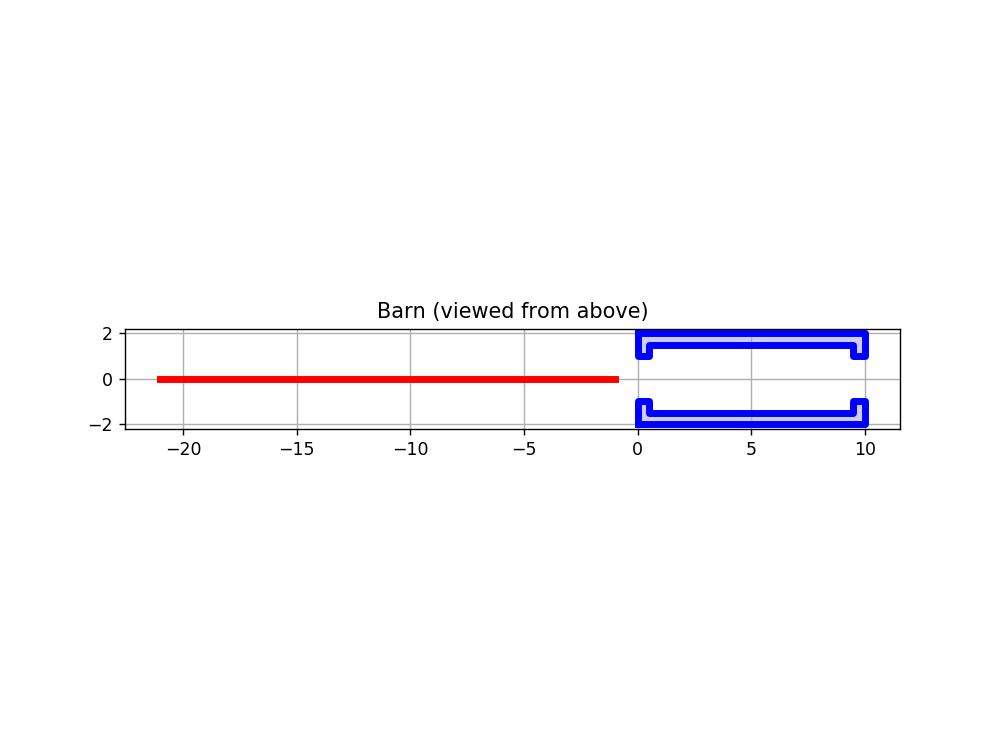

In [30]:
fig, ax = plt.subplots( figsize=(8,6) )

#transpose barn arrays
xx = BarnTOP.transpose()[0]
yy = BarnTOP.transpose()[1]

qq = BarnBOT.transpose()[0]
ww = BarnBOT.transpose()[1]

pxx = pole.transpose()[0]
pyy = pole.transpose()[1]


ax.fill( xx, yy, 'b', qq, ww, 'b', alpha=0.2)

#ax.plot( xx, yy, qq, ww, 'ko', label='dots')
ax.set_aspect(1.0)
ax.plot( xx, yy, 'b-', qq, ww, 'b-', pxx, pyy, 'r-', label='lines', lw=4)
plt.title('Barn (viewed from above)')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


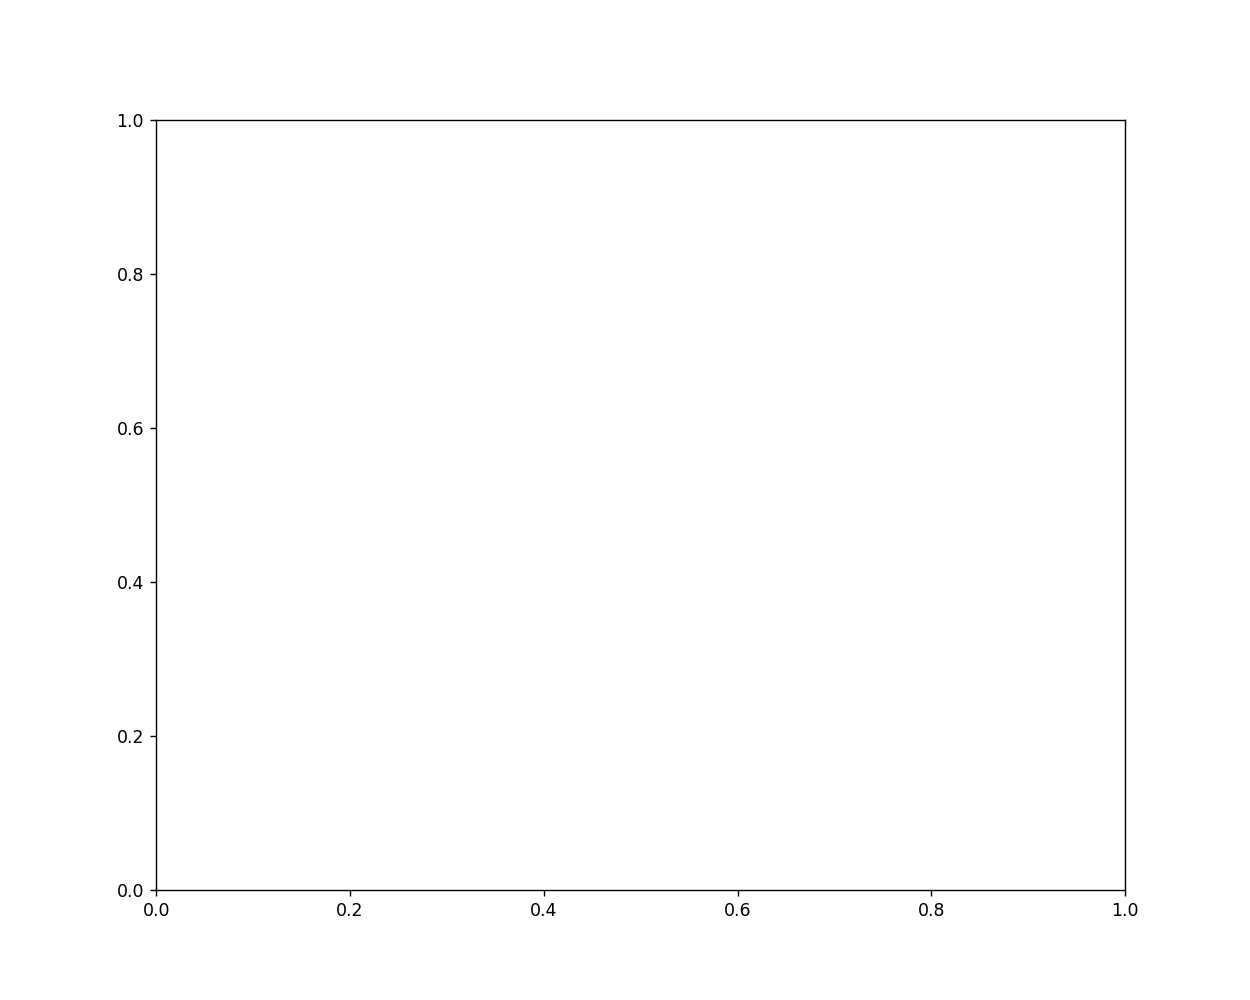

NameError: name 'ttp' is not defined

In [31]:
# Find the pole moving in S'-frame.
#ttp = np.linspace(-1, 20, 22, endpoint=True)

fig, ax = plt.subplots( figsize = (10,8) )

for attp in ttp:
    aa = pole.shapeXPAtTP(attp)
    
    bb = aa.transpose()
    yy = bb[0]
    xx = bb[1]
    
    ax.plot(xx, yy, 'b-', lw=4)

ax.set_xlabel("X'")
ax.set_ylabel("T'")
ax.set_title('Pole in S\'-frame')
ax.grid(True)
plt.show()

<IPython.core.display.Javascript object>


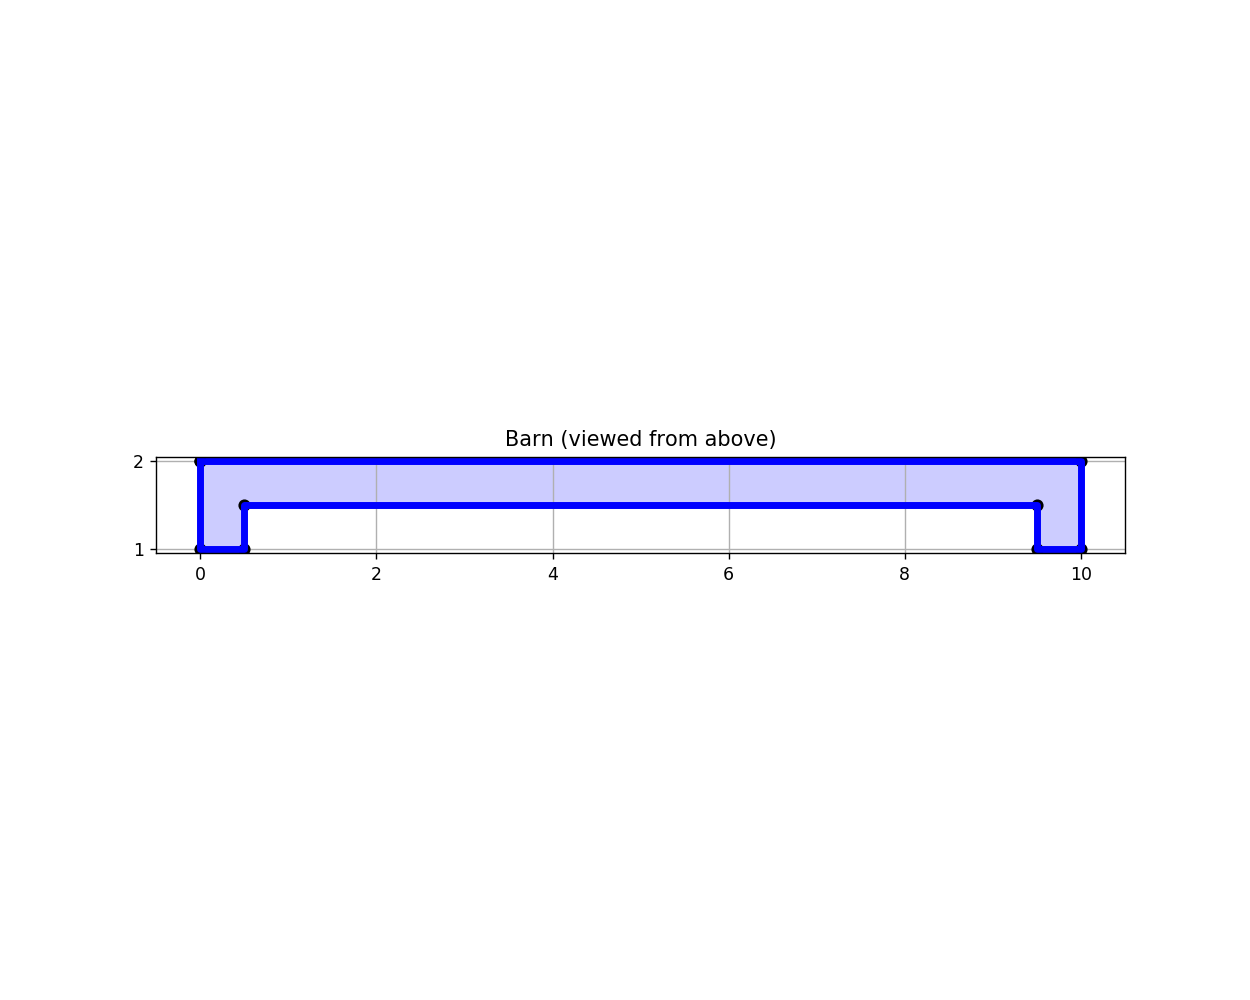

AttributeError: 'numpy.ndarray' object has no attribute 'shapeXAtT'

In [32]:
# Find the pole moving in S-frame.
tt = np.linspace(-1, 20, 22, endpoint=True)

fig, ax = plt.subplots( figsize = (10,8) )

for att in tt:
    aa = pole.shapeXAtT(att)
    
    bb = aa.transpose()
    yy = bb[0]
    xx = bb[1]
    
    ax.plot(xx, yy, 'b-', lw=4)

ax.set_xlabel("X")
ax.set_ylabel("T")
ax.set_title('Pole in S-frame')
ax.grid(True)
plt.show()

In [33]:
# Draw a closed polygon as a starting shape at t'=0, and will move by m' .
#
# Make it 1 deep and +/- 1/4 for y.  All in the x-y plane and time is t' = 0.0 say.
xw = 0.5 #xwidth of the barn wall (door side)
yw = 1.5  #ywidth of the barn wall (non-door side)
yh = 2 #height
xl = 3.5 #total barn length
# Append t later.
BarnTOP = np.array([ [0.0, yh], [0.0, 1.0], [xw, 1.0], [xw, yw], [xl-xw, yw], [xl-xw, 1.0], [xl, 1.0], [xl, yh], [0.0, yh] ])
#fig, ax = plt.subplots( figsize=(8,6) )
print(BarnTOP)
#xx = BarnTOP.transpose()[0]
#yy = BarnTOP.transpose()[1]
BarnTOP2 = np.array([ [0.0, yh], [0.0, 1.0], [xw, 1.0], [xw, yw], [xl-xw, yw], [xl-xw, 1.0], [xl, 1.0], [xl, yh], [0.0, yh] ])
np.fliplr(BarnTOP2)
print(BarnTOP2)

#fig, ax = plt.subplots( figsize=(8,6) )

#(xx,yy) = aa.transpose


ax.fill( xx, yy, 'b', alpha=0.2)

ax.plot( xx, yy, 'ko', label='dots')
ax.set_aspect(1)
ax.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Barn (viewed from above)')
plt.grid(True)
plt.show()

[[0.  2. ]
 [0.  1. ]
 [0.5 1. ]
 [0.5 1.5]
 [3.  1.5]
 [3.  1. ]
 [3.5 1. ]
 [3.5 2. ]
 [0.  2. ]]
[[0.  2. ]
 [0.  1. ]
 [0.5 1. ]
 [0.5 1.5]
 [3.  1.5]
 [3.  1. ]
 [3.5 1. ]
 [3.5 2. ]
 [0.  2. ]]


<IPython.core.display.Javascript object>


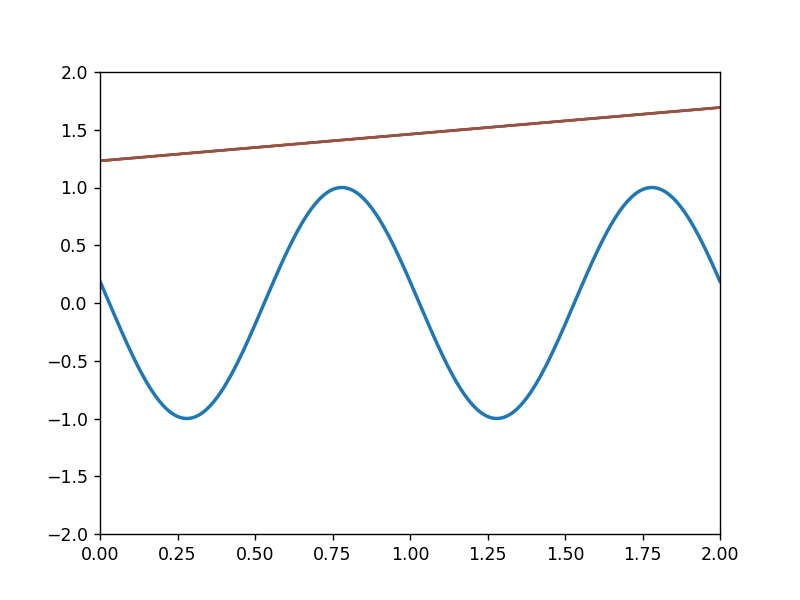

In [34]:
#%matplotlib notebook
from matplotlib.animation import FuncAnimation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [35]:
 from matplotlib.figure import Figure                       
 from matplotlib.axes import Axes                           
 from matplotlib.lines import Line2D                        
 from matplotlib.backends.backend_agg import FigureCanvasAgg
 
 fig = Figure(figsize=[4,4])                                
 ax = Axes(fig, [.1,.1,.8,.8])                              
 fig.add_axes(ax)                                           
 l = Line2D([0,1],[0,1])                                    
 ax.add_line(l)                                             
 
 canvas = FigureCanvasAgg(fig)                              
 canvas.print_figure("line_ex.png")       

<IPython.core.display.Javascript object>


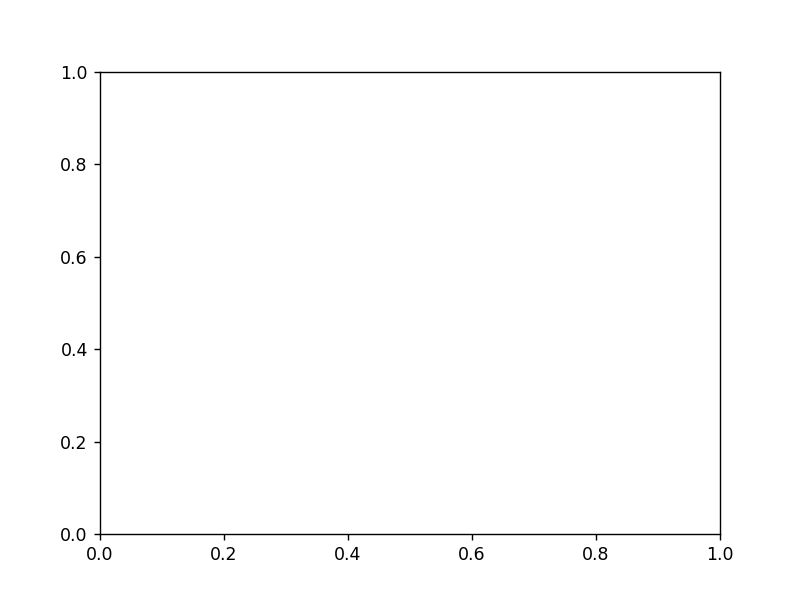

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

In [29]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, 1);